# Classification Ionosphere

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score

In [20]:
df = pd.read_csv('2024_ionosphere_data.csv', header=None)
columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['target']
df.columns = columns

# Transform the target column to 0 (good) and 1 (bad)
df['target'] = df['target'].map({'g': 0, 'b': 1})

X = df.drop(columns=['target']).to_numpy()
y = df['target'].to_numpy().reshape(-1, 1)

# Split the dataset into training (80%) and testing (20%)
test_size = 0.2
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.seed(42)
np.random.shuffle(indices)

num_test_samples = int(test_size * num_samples)
train_indices = indices[:num_samples - num_test_samples]
test_indices = indices[num_samples - num_test_samples:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')

Training set size: (281, 34)
Testing set size: (70, 34)


Epoch 1, Training Loss: 0.6560798441855624
Epoch 2, Training Loss: 0.6422740954038287
Epoch 3, Training Loss: 0.6340010696552185
Epoch 4, Training Loss: 0.6272906894061028
Epoch 5, Training Loss: 0.6224236113361463
Epoch 6, Training Loss: 0.618246271603342
Epoch 7, Training Loss: 0.6142114664284355
Epoch 8, Training Loss: 0.6107411251536919
Epoch 9, Training Loss: 0.6071419516871379


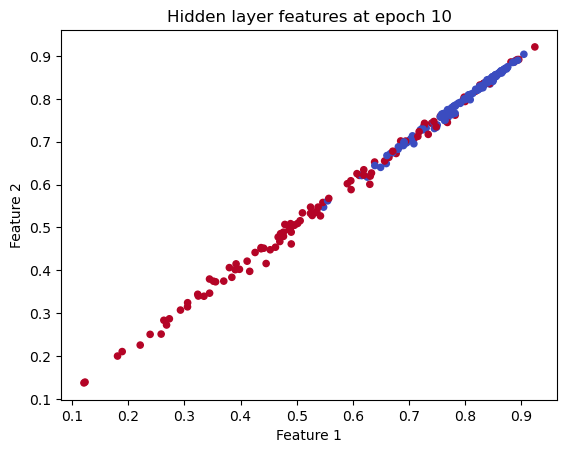

Epoch 10, Training Loss: 0.6043330153916696
Epoch 11, Training Loss: 0.6007416948328366
Epoch 12, Training Loss: 0.5977618459792745
Epoch 13, Training Loss: 0.5953251163976188
Epoch 14, Training Loss: 0.5925955871782782
Epoch 15, Training Loss: 0.5898257495651437
Epoch 16, Training Loss: 0.5865980132612134
Epoch 17, Training Loss: 0.5843366478144838
Epoch 18, Training Loss: 0.5846681365957471
Epoch 19, Training Loss: 0.5814822963070945
Epoch 20, Training Loss: 0.5790242143234918
Epoch 21, Training Loss: 0.5768051830298954
Epoch 22, Training Loss: 0.5721203701850449
Epoch 23, Training Loss: 0.5704461503457943
Epoch 24, Training Loss: 0.5686488232869389
Epoch 25, Training Loss: 0.5662266006666177
Epoch 26, Training Loss: 0.5642450057309972
Epoch 27, Training Loss: 0.5618341976637726
Epoch 28, Training Loss: 0.5597364762999463
Epoch 29, Training Loss: 0.5567141265997568
Epoch 30, Training Loss: 0.5547017440992656
Epoch 31, Training Loss: 0.5530155618847927
Epoch 32, Training Loss: 0.55090

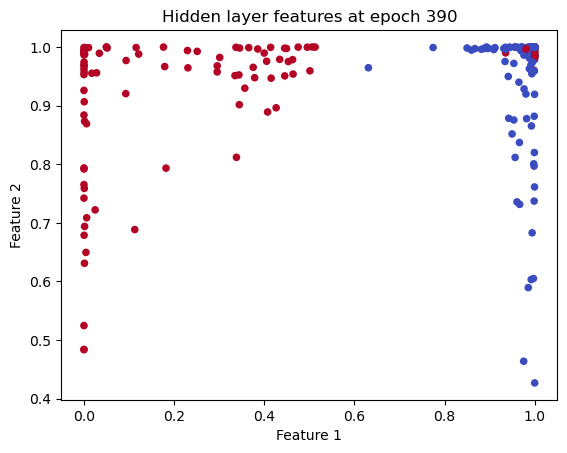

Epoch 390, Training Loss: 0.2430296837545288
Epoch 391, Training Loss: 0.24261142903037888
Epoch 392, Training Loss: 0.24247269639997676
Epoch 393, Training Loss: 0.24225133920353648
Epoch 394, Training Loss: 0.24303739038493047
Epoch 395, Training Loss: 0.2426668915572497
Epoch 396, Training Loss: 0.24218007392763924
Epoch 397, Training Loss: 0.24222453192235194
Epoch 398, Training Loss: 0.24271322061182343
Epoch 399, Training Loss: 0.2424525132675403
Epoch 400, Training Loss: 0.24179622207103788
Epoch 401, Training Loss: 0.2413422703941125
Epoch 402, Training Loss: 0.24151525678637578
Epoch 403, Training Loss: 0.24124356770000568
Epoch 404, Training Loss: 0.2411068983232592
Epoch 405, Training Loss: 0.24112894216568642
Epoch 406, Training Loss: 0.24079867572640215
Epoch 407, Training Loss: 0.24080995465436
Epoch 408, Training Loss: 0.24061802838690893
Epoch 409, Training Loss: 0.24030275219791813
Epoch 410, Training Loss: 0.24070103995987188
Epoch 411, Training Loss: 0.24031400195245

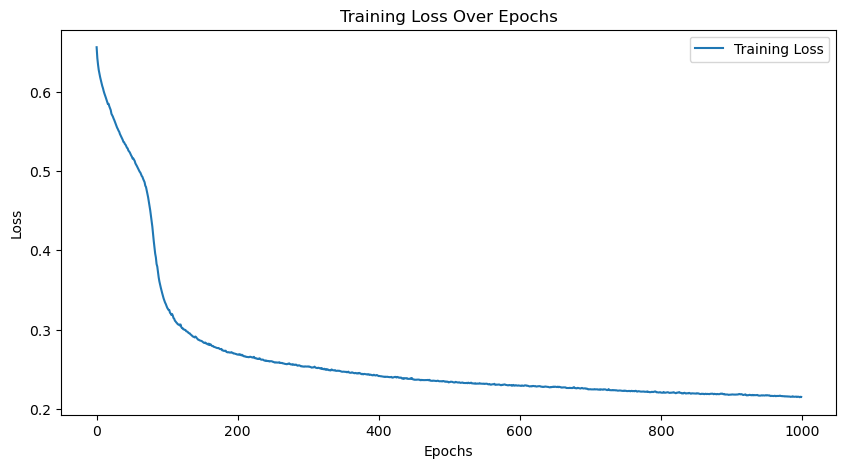

In [21]:
# Initialize weights function
def initialize_weights(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim) * 0.01

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.mean(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
    return loss

class ClassificationNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate
        
        # Initialize weights
        self.weights_input_hidden = initialize_weights(self.input_size, self.hidden_size)
        self.weights_hidden_output = initialize_weights(self.hidden_size, self.output_size)
    
    def forward_propagation(self, inputs):
        self.hidden_input = np.dot(inputs, self.weights_input_hidden)
        self.hidden_output = sigmoid(self.hidden_input)
        output_input = np.dot(self.hidden_output, self.weights_hidden_output)
        final_output = sigmoid(output_input)
        return final_output
    
    def backpropagation(self, inputs, target_output, predicted_output):
        output_error = target_output - predicted_output
        output_delta = output_error * sigmoid_derivative(predicted_output)
        
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.lr
        self.weights_input_hidden += inputs.T.dot(hidden_delta) * self.lr
    
    def predict(self, inputs):
        return self.forward_propagation(inputs)
    
    def extract_epoch(self, inputs):
        hidden_input = np.dot(inputs, self.weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        return hidden_output

# Plot hidden features
def plot_hidden_features(X, y, epoch, model):
    features = model.extract_epoch(X)
    plt.scatter(features[:, 0], features[:, 1], c=y.flatten(), cmap='coolwarm', s=20)
    plt.title(f"Hidden layer features at epoch {epoch}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Mini-batch gradient descent training
def train_network(model, X_train, y_train, batch_size=32, num_epochs=1000):
    training_errors = []
    num_batches = len(X_train) // batch_size
    
    for epoch in range(num_epochs):
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]
        
        for batch in range(num_batches):
            # Get the mini-batch
            start = batch * batch_size
            end = start + batch_size
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            
            # Perform forward and backward pass for each sample in the batch
            for i in range(len(X_batch)):
                inputs = X_batch[i].reshape(1, -1)
                target_output = y_batch[i].reshape(1, -1)
                predicted_output = model.forward_propagation(inputs)
                model.backpropagation(inputs, target_output, predicted_output)

        # Plot hidden layer features at specific epochs
        if epoch == 9 or epoch == 389:
            plot_hidden_features(X_train, y_train, epoch+1, model)

        # Calculate training error (cross-entropy loss) after each epoch
        predictions = model.predict(X_train)
        loss = cross_entropy_loss(y_train, predictions)
        training_errors.append(loss)
        print(f"Epoch {epoch+1}, Training Loss: {loss}")
    
    return training_errors

# Plot training curve
def plot_training_curve(errors):
    plt.figure(figsize=(10, 5))
    plt.plot(errors, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Network initialization
nn = ClassificationNetwork(input_size=X_train.shape[1], hidden_size=2, output_size=1)

# Train the network
errors = train_network(nn, X_train, y_train, batch_size=32, num_epochs=1000)
plot_training_curve(errors)

In [22]:
train_predictions = nn.predict(X_train)
train_error = np.mean(np.abs(y_train - train_predictions))
print(f'train Error: {train_error}')

train Error: 0.12180645357505039


Test Error: 0.18694211252921944
F1 Score: 0.7692307692307693


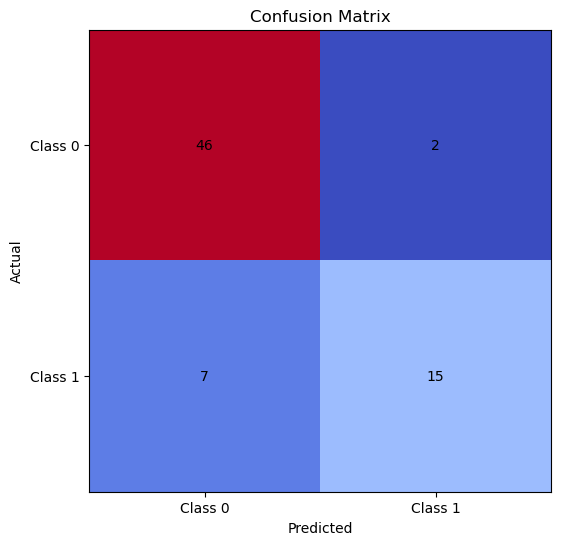

Accuracy: 0.8714285714285714


In [23]:
# Evaluate on test data
test_predictions = nn.predict(X_test)
test_error = np.mean(np.abs(y_test - test_predictions))
print(f'Test Error: {test_error}')

# F1 score
f1 = f1_score(y_test, np.round(test_predictions))
print(f'F1 Score: {f1}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(test_predictions))
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, np.round(test_predictions))
print(f'Accuracy: {accuracy}')

Training with 8 hidden nodes...
Epoch 1, Training Loss: 0.6555604772388882
Epoch 2, Training Loss: 0.6515465268657343
Epoch 3, Training Loss: 0.6499474772228436
Epoch 4, Training Loss: 0.6450882684879573
Epoch 5, Training Loss: 0.641218014705701
Epoch 6, Training Loss: 0.6379162959238164
Epoch 7, Training Loss: 0.636638375275462
Epoch 8, Training Loss: 0.6319807282259896
Epoch 9, Training Loss: 0.6311567704566124


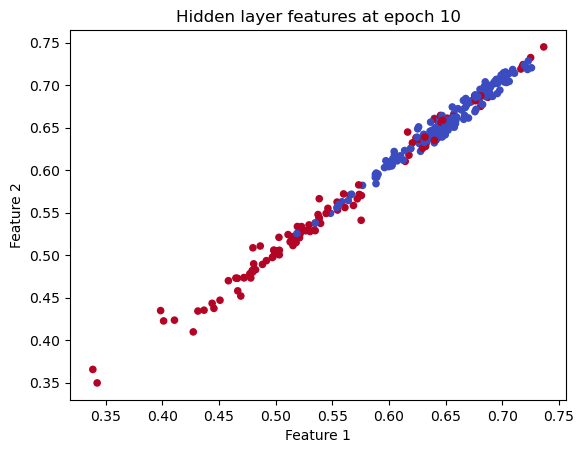

Epoch 10, Training Loss: 0.6260114667920171
Epoch 11, Training Loss: 0.6149289548231195
Epoch 12, Training Loss: 0.6038915428103857
Epoch 13, Training Loss: 0.5905778231448933
Epoch 14, Training Loss: 0.5727202443486806
Epoch 15, Training Loss: 0.545404074879996
Epoch 16, Training Loss: 0.5373171397288868
Epoch 17, Training Loss: 0.4923799051412071
Epoch 18, Training Loss: 0.4660585217035456
Epoch 19, Training Loss: 0.44551339920919286
Epoch 20, Training Loss: 0.4265068133526273
Epoch 21, Training Loss: 0.41345038370411114
Epoch 22, Training Loss: 0.39859667865169146
Epoch 23, Training Loss: 0.3799842551327346
Epoch 24, Training Loss: 0.37354449057589284
Epoch 25, Training Loss: 0.3586298817345804
Epoch 26, Training Loss: 0.35554219422412553
Epoch 27, Training Loss: 0.3435170429009292
Epoch 28, Training Loss: 0.3353195985137157
Epoch 29, Training Loss: 0.3301224178640594
Epoch 30, Training Loss: 0.3349829750848745
Epoch 31, Training Loss: 0.319355459251468
Epoch 32, Training Loss: 0.31

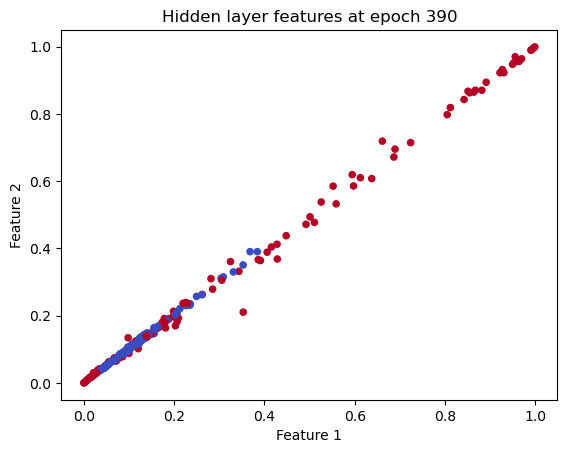

Epoch 390, Training Loss: 0.04069971711538662
Epoch 391, Training Loss: 0.04062927864297134
Epoch 392, Training Loss: 0.04051946452517723
Epoch 393, Training Loss: 0.040496631475828666
Epoch 394, Training Loss: 0.04037953232645134
Epoch 395, Training Loss: 0.04044952203851485
Epoch 396, Training Loss: 0.04023442086675143
Epoch 397, Training Loss: 0.040256549965701355
Epoch 398, Training Loss: 0.0402653149828571
Epoch 399, Training Loss: 0.04028427674442618
Epoch 400, Training Loss: 0.040146483585058346
Epoch 401, Training Loss: 0.0398733483196684
Epoch 402, Training Loss: 0.039751049713598906
Epoch 403, Training Loss: 0.039843004151485784
Epoch 404, Training Loss: 0.03987949857093202
Epoch 405, Training Loss: 0.03974019608628387
Epoch 406, Training Loss: 0.03967326450354198
Epoch 407, Training Loss: 0.039559266744712704
Epoch 408, Training Loss: 0.039477298736234116
Epoch 409, Training Loss: 0.039421173646351254
Epoch 410, Training Loss: 0.03938892097162158
Epoch 411, Training Loss: 0.

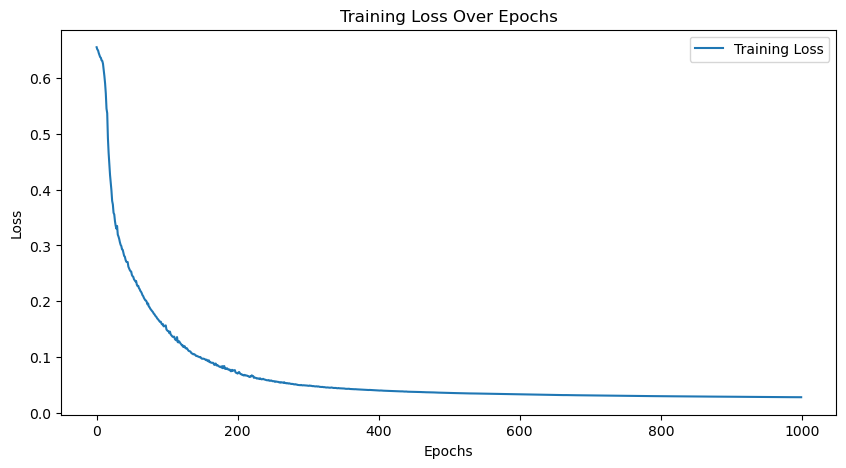

Finished training with 8 hidden nodes.
--------------------------------------------------
Training with 16 hidden nodes...
Epoch 1, Training Loss: 0.6627613243722887
Epoch 2, Training Loss: 0.6551434794088827
Epoch 3, Training Loss: 0.6532630135092602
Epoch 4, Training Loss: 0.6503431077323011
Epoch 5, Training Loss: 0.6489483312818715
Epoch 6, Training Loss: 0.644700772599474
Epoch 7, Training Loss: 0.6400221691684451
Epoch 8, Training Loss: 0.6339935538771885
Epoch 9, Training Loss: 0.6097450498073518


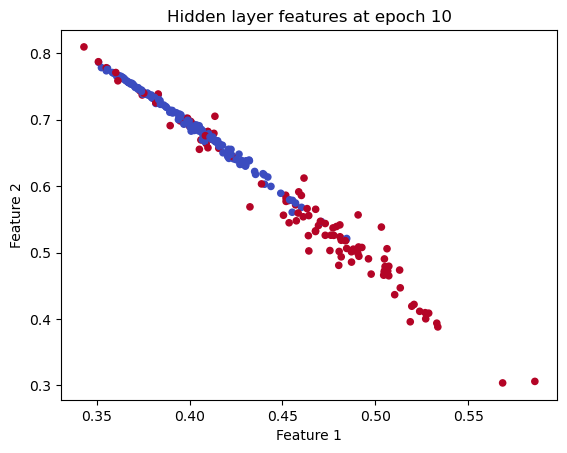

Epoch 10, Training Loss: 0.5841213256453751
Epoch 11, Training Loss: 0.5531866339750355
Epoch 12, Training Loss: 0.5139579351515419
Epoch 13, Training Loss: 0.47773060837681125
Epoch 14, Training Loss: 0.4565337530041539
Epoch 15, Training Loss: 0.430542289415479
Epoch 16, Training Loss: 0.401735042864975
Epoch 17, Training Loss: 0.3860902678058887
Epoch 18, Training Loss: 0.3699477646760462
Epoch 19, Training Loss: 0.3582026080019407
Epoch 20, Training Loss: 0.34792133233128886
Epoch 21, Training Loss: 0.3396512357634362
Epoch 22, Training Loss: 0.33163159025868977
Epoch 23, Training Loss: 0.32659533876070773
Epoch 24, Training Loss: 0.31915927783801723
Epoch 25, Training Loss: 0.31791139223903714
Epoch 26, Training Loss: 0.31077746750590785
Epoch 27, Training Loss: 0.30631678291675146
Epoch 28, Training Loss: 0.30176884855417396
Epoch 29, Training Loss: 0.2995785506070716
Epoch 30, Training Loss: 0.2965100494716978
Epoch 31, Training Loss: 0.2965599780641024
Epoch 32, Training Loss: 

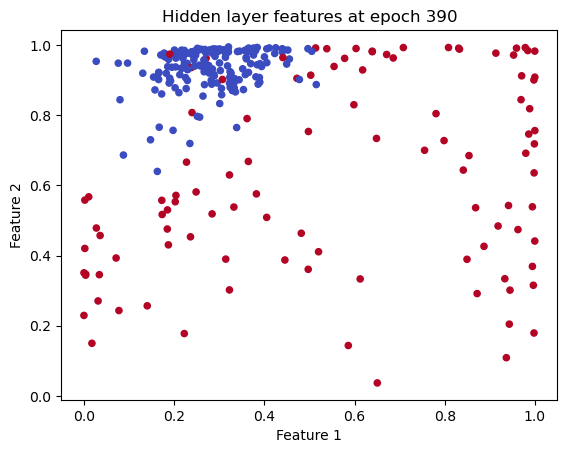

Epoch 390, Training Loss: 0.06092209634733287
Epoch 391, Training Loss: 0.060818584468346336
Epoch 392, Training Loss: 0.06098397620853253
Epoch 393, Training Loss: 0.06092082375691048
Epoch 394, Training Loss: 0.060856589163569445
Epoch 395, Training Loss: 0.06078409115729851
Epoch 396, Training Loss: 0.060848579109873006
Epoch 397, Training Loss: 0.06074130939658378
Epoch 398, Training Loss: 0.06061310539162871
Epoch 399, Training Loss: 0.06067358876733765
Epoch 400, Training Loss: 0.06072774980895982
Epoch 401, Training Loss: 0.06068213324594641
Epoch 402, Training Loss: 0.06046986631142837
Epoch 403, Training Loss: 0.06044125661214276
Epoch 404, Training Loss: 0.060410123007629525
Epoch 405, Training Loss: 0.06039199220423604
Epoch 406, Training Loss: 0.06038744100564163
Epoch 407, Training Loss: 0.060357738323301255
Epoch 408, Training Loss: 0.06033957325305776
Epoch 409, Training Loss: 0.06029193713386831
Epoch 410, Training Loss: 0.06019079144181208
Epoch 411, Training Loss: 0.0

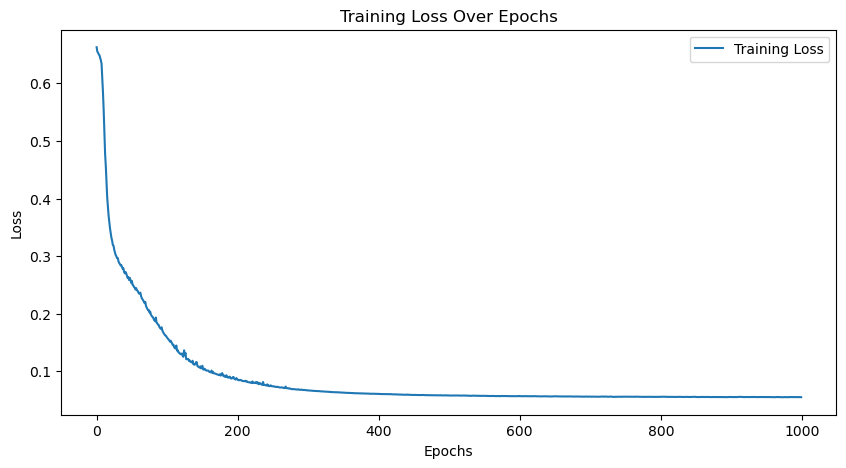

Finished training with 16 hidden nodes.
--------------------------------------------------
Training with 32 hidden nodes...
Epoch 1, Training Loss: 0.6730737773808189
Epoch 2, Training Loss: 0.6660493094675787
Epoch 3, Training Loss: 0.6547320790317164
Epoch 4, Training Loss: 0.6516474681381212
Epoch 5, Training Loss: 0.6488603699888693
Epoch 6, Training Loss: 0.6386168554519442
Epoch 7, Training Loss: 0.6293540013480539
Epoch 8, Training Loss: 0.5932758898296155
Epoch 9, Training Loss: 0.5478713367001037


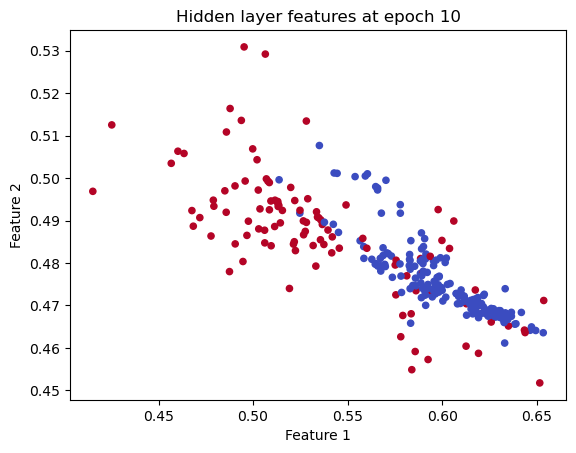

Epoch 10, Training Loss: 0.5169779849126502
Epoch 11, Training Loss: 0.4695567518495802
Epoch 12, Training Loss: 0.43424256187747123
Epoch 13, Training Loss: 0.4150655568971753
Epoch 14, Training Loss: 0.3869953631061921
Epoch 15, Training Loss: 0.36884892618050025
Epoch 16, Training Loss: 0.36269285455912986
Epoch 17, Training Loss: 0.345217360873094
Epoch 18, Training Loss: 0.3366356459970093
Epoch 19, Training Loss: 0.3306035896368377
Epoch 20, Training Loss: 0.321610913748363
Epoch 21, Training Loss: 0.31583731647149016
Epoch 22, Training Loss: 0.31534951567337194
Epoch 23, Training Loss: 0.306562157557372
Epoch 24, Training Loss: 0.3154396560797026
Epoch 25, Training Loss: 0.2993059237730648
Epoch 26, Training Loss: 0.2994621717640626
Epoch 27, Training Loss: 0.29917434720528563
Epoch 28, Training Loss: 0.29713104837426413
Epoch 29, Training Loss: 0.300166620788195
Epoch 30, Training Loss: 0.28740831762764507
Epoch 31, Training Loss: 0.2842244231041767
Epoch 32, Training Loss: 0.2

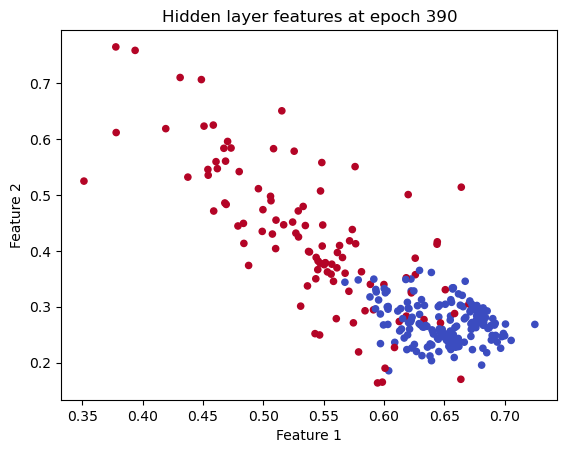

Epoch 390, Training Loss: 0.0628969267724328
Epoch 391, Training Loss: 0.0628420522309579
Epoch 392, Training Loss: 0.06309326987555706
Epoch 393, Training Loss: 0.06279763304916931
Epoch 394, Training Loss: 0.06291572634821148
Epoch 395, Training Loss: 0.06282316710724248
Epoch 396, Training Loss: 0.06310652455186377
Epoch 397, Training Loss: 0.06254017834786751
Epoch 398, Training Loss: 0.062445260274587834
Epoch 399, Training Loss: 0.06237478841911187
Epoch 400, Training Loss: 0.06242624239007909
Epoch 401, Training Loss: 0.062781061176746
Epoch 402, Training Loss: 0.06241013536264699
Epoch 403, Training Loss: 0.06249673824449025
Epoch 404, Training Loss: 0.06237389280761978
Epoch 405, Training Loss: 0.06237150926120763
Epoch 406, Training Loss: 0.06282058354394306
Epoch 407, Training Loss: 0.06261692404273056
Epoch 408, Training Loss: 0.06308727630634094
Epoch 409, Training Loss: 0.06238609344303616
Epoch 410, Training Loss: 0.062656288439308
Epoch 411, Training Loss: 0.06254841153

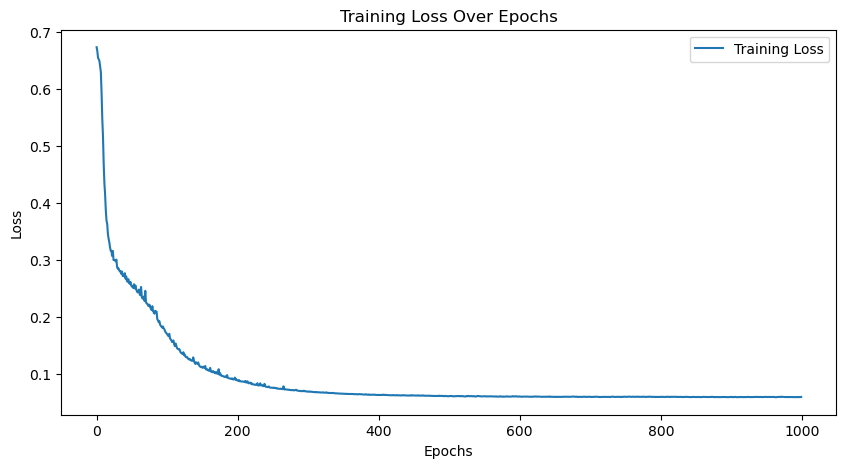

Finished training with 32 hidden nodes.
--------------------------------------------------


In [24]:
hidden_sizes = [8, 16, 32]

for hidden_size in hidden_sizes:
    print(f"Training with {hidden_size} hidden nodes...")
    nn = ClassificationNetwork(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=1)
    errors = train_network(nn, X_train, y_train)
    plot_training_curve(errors)
    print(f"Finished training with {hidden_size} hidden nodes.")
    print("--------------------------------------------------")
